In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('Reviews.csv', nrows=500)
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [ ]:
df.info()

In [4]:
df.Summary.head()

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [5]:
df.Text.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [6]:
pip install textblob

     -------------------------------------- 624.3/624.3 kB 6.5 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 7.4 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7
Note: you may need to restart the kernel to use updated packages.


In [7]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].str.replace('[^\w\s]', '')

stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))

df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df.Text.head()

C:\Users\gunda\AppData\Local\Temp\ipykernel_22908\3705179473.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('[^\w\s]', '')


0    bought several vitality canned dog food produc...
1    product arrived labelled lumbo halted peanutst...
2    connection around century light pillow city ge...
3    looking secret ingredient robitussin believe f...
4    great staff great price wide assortment mummy ...
Name: Text, dtype: object

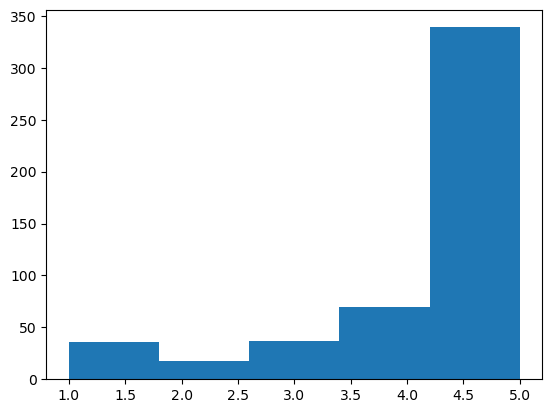

Score
1     36
2     18
3     37
4     70
5    339
Name: Id, dtype: int64


In [8]:
reviews=df
reviews.dropna(inplace=True)
reviews.Score.hist(bins=5,grid=False)
plt.show()
print(reviews.groupby('Score').count().Id)

In [12]:
from nltk.corpus import stopwords
from textblob import Word

df['Text'] = df['Text'].apply(lambda x: "".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].str.replace('[^\w\s]', '', regex=True)  # Added regex=True to avoid warnings
stop = stopwords.words('english')  # Corrected this line
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split() if word not in stop]))
df.Text.head()


0    boughtseveralvitalitycanneddogfoodproductfound...
1    productarrivedlabelledlumbohaltedpeanutsthepea...
2    connectionaroundcenturylightpillowcitygelatinn...
3    lookingsecretingredientrobitussinbelievefoundg...
4    greatstaffgreatpricewideassortmentmummystaffde...
Name: Text, dtype: object